In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pronto_soccorso.csv", delimiter = "\t")
df.shape

(160989, 29)

In [3]:
df.head()

,Unnamed: 0,ASL,BIANCHI_ATT,BIANCHI_OB,BIANCHI_TRATT,CODICE,COMUNE,DATA,GIALLI_ATT,GIALLI_OB,...,STATO_IN_PS2,TIPO,TOT_ATT,TOT_OB,TOT_RT,TOT_TRATT,TUTTI,VERDI_ATT,VERDI_OB,VERDI_TRATT
0,0,RM6,1,0,0,4300,Anzio,2019-04-26T11:29:00,0,1,...,OSSERVAZIONE_BREVE,DEA I,8,3,16,12,39,7,1,5
1,1,RM2,4,0,8,92000,Roma,2019-04-26T11:28:00,0,15,...,OSSERVAZIONE_BREVE,DEA I,12,28,40,44,124,6,12,23
2,2,RM1,1,0,0,91900,Roma,2019-04-26T11:28:00,0,3,...,OSSERVAZIONE_BREVE,DEA I,5,4,43,30,82,4,0,11
3,3,RM1,2,0,0,90600,Roma,2019-04-26T11:28:00,9,0,...,OSSERVAZIONE_BREVE,DEA II,13,0,44,48,105,2,0,9
4,4,RM1,0,0,0,90501,Roma,2019-04-26T11:28:00,2,13,...,OSSERVAZIONE_BREVE,DEA II,8,26,55,37,126,6,9,18


In [4]:
df["DATA"] = df['DATA'].apply(pd.to_datetime)

In [5]:
from calendar import weekday, day_name
import calendar

def get_day_of_month(dt):
    return dt.day

df['Day'] = df['DATA'].apply(get_day_of_month)

def get_weekday(dt):
    #return calendar.day_abbr[dt.weekday()]
    return dt.weekday()

df["Weekday"] = df["DATA"].apply(get_weekday)

def get_hour(dt):
    return dt.hour

df["hour"] = df["DATA"].apply(get_hour)

#df.tail(5)

In [6]:
def count_rows(rows):
    return len(rows)

by_date = df.groupby('Day').apply(count_rows)
by_date

Day
5     114894
14       315
26      4603
27      9692
28     10388
29     10507
30     10590
dtype: int64

In [34]:
table_b = pd.pivot_table(data = df, values=['BIANCHI_ATT','BIANCHI_OB', 'BIANCHI_TRATT'] ,index= ["Weekday"] , aggfunc= np.sum)
table_r = pd.pivot_table(data = df, values=['ROSSI_ATT','ROSSI_OB', 'ROSSI_TRATT'] ,index= ["Weekday"] , aggfunc= np.sum)
table_v = pd.pivot_table(data = df, values=['VERDI_ATT','VERDI_OB', 'VERDI_TRATT'] ,index= ["Weekday"] , aggfunc= np.sum)
table_g = pd.pivot_table(data = df, values=['GIALLI_ATT','GIALLI_OB', 'GIALLI_TRATT'] ,index= ["Weekday"] , aggfunc= np.sum)
table_T = pd.pivot_table(data = df, values=['TOT_ATT','TOT_OB', 'TOT_TRATT' , 'TUTTI'] ,index= ["Weekday"] , aggfunc= np.sum)
table_mixATT = pd.pivot_table(data = df, values=['BIANCHI_ATT','ROSSI_ATT', 'GIALLI_ATT', 'VERDI_ATT' ] ,index= ["Weekday"] , aggfunc= np.sum)
table_mixOB = pd.pivot_table(data = df, values=['BIANCHI_OB','ROSSI_OB', 'GIALLI_OB' , 'VERDI_OB'] ,index= ["Weekday"] , aggfunc= np.sum)
table_mixTRATT = pd.pivot_table(data = df, values=['BIANCHI_TRATT','ROSSI_TRATT', 'GIALLI_TRATT', 'VERDI_TRATT' ] ,index= ["Weekday"] , aggfunc= np.sum)



In [81]:
sum_b = table_b.sum(axis=1)
sum_r = table_r.sum(axis=1)
sum_g = table_g.sum(axis=1)
sum_v = table_v.sum(axis=1)
sum_T = table_T['TUTTI']
table_T

,TOT_ATT,TOT_OB,TOT_TRATT,TUTTI
Weekday,,,,
0,119740,107684,311503,766924
1,246714,210060,623118,1485464
2,60572,48723,145053,361747
3,68504,79612,204560,500874
4,160811,118039,387653,910878
5,163026,151558,434084,1037437
6,95815,100593,261177,658217


In [75]:
total_n = pd.concat([sum_b, sum_r, sum_g, sum_v, sum_T], axis=1)
total_n

,0,1,2,3,TUTTI
Weekday,,,,,
0,13570,35334,225915,258633,766924
1,28001,63716,465719,511081,1485464
2,5957,14870,110087,121119,361747
3,8545,20574,151143,169115,500874
4,15973,38127,283488,322840,910878
5,18513,45666,317137,360609,1037437
6,11858,31840,192220,217430,658217


''

<Figure size 1080x504 with 0 Axes>

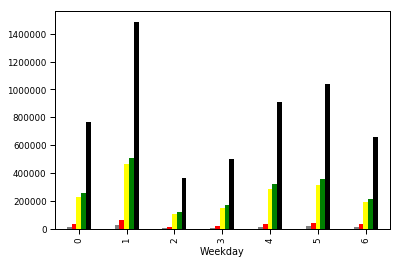

In [74]:
plt.figure(figsize=(15,7))
total_n.plot(kind='bar', color = ['grey', 'red', 'yellow', 'green', 'black'], legend=False)
;

In [11]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [12]:
table_T['Weekdays'] = weekdays
table_r['Weekdays'] = weekdays
table_b['Weekdays'] = weekdays
table_v['Weekdays'] = weekdays
table_g['Weekdays'] = weekdays
table_mixTRATT['Weekdays'] = weekdays
table_mixOB['Weekdays'] = weekdays
table_mixATT['Weekdays'] = weekdays

In [13]:
table_T.set_index('Weekdays', inplace=True)
table_r.set_index('Weekdays', inplace=True)
table_b.set_index('Weekdays', inplace=True)
table_v.set_index('Weekdays', inplace=True)
table_g.set_index('Weekdays', inplace=True)
table_mixTRATT.set_index('Weekdays', inplace=True)
table_mixOB.set_index('Weekdays', inplace=True)
table_mixATT.set_index('Weekdays', inplace=True)

<Figure size 648x432 with 0 Axes>

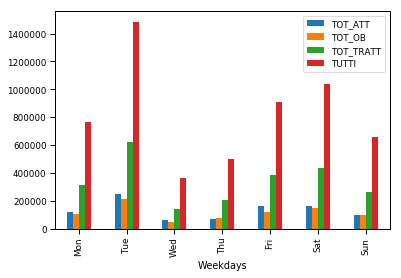

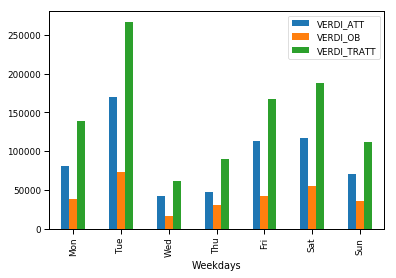

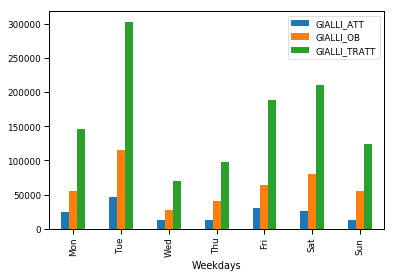

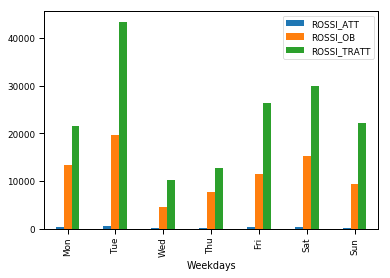

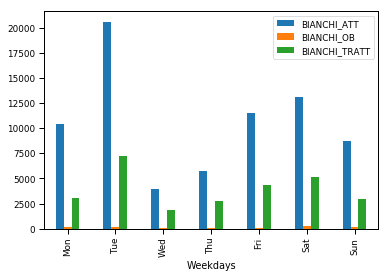

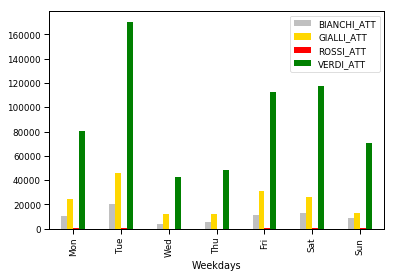

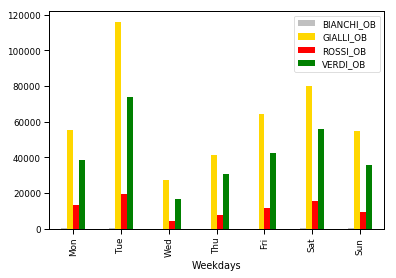

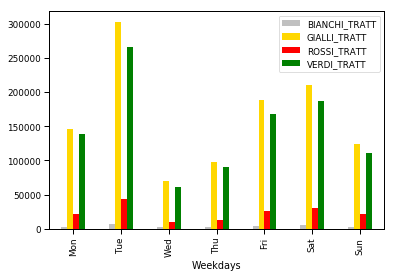

In [28]:
plt.figure(figsize=(9,6))
table_T.plot.bar(by = 'Weekdays')
table_v.plot.bar(by = 'Weekdays')
table_g.plot.bar(by = 'Weekdays')
table_r.plot.bar(by = 'Weekdays')
table_b.plot.bar(by = 'Weekdays')
table_mixATT.plot.bar(by = 'Weekdays' ,color = ['silver' , 'gold' , 'r', 'green'])
table_mixOB.plot.bar(by = 'Weekdays' ,color = ['silver' , 'gold' , 'r', 'green'])
table_mixTRATT.plot.bar(by = 'Weekdays', color = ['silver' , 'gold' , 'r', 'green'])
plt.show( )

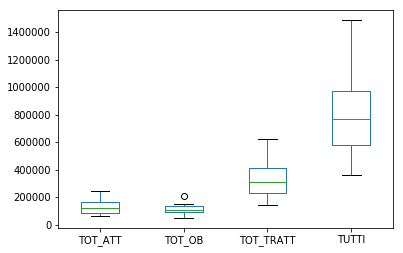

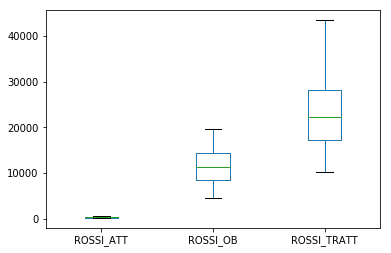

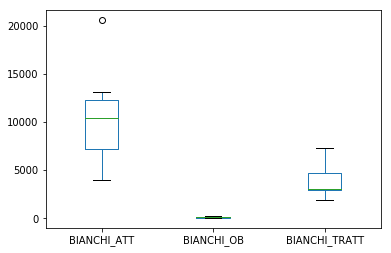

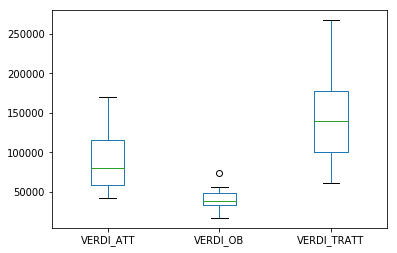

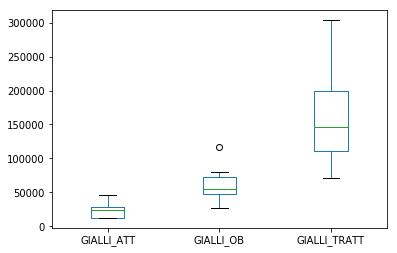

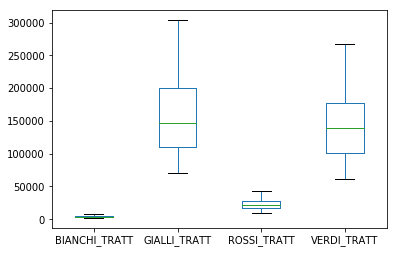

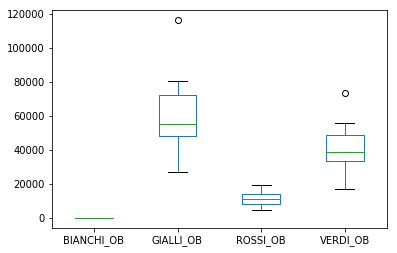

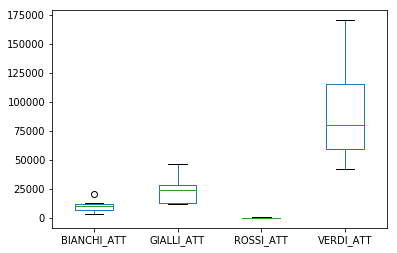

In [10]:
table_T.plot.box()
table_r.plot.box()
table_b.plot.box()
table_v.plot.box()
table_g.plot.box()
table_mixTRATT.plot.box()
table_mixOB.plot.box()
table_mixATT.plot.box()
plt.show()

In [14]:
table_r

,ROSSI_ATT,ROSSI_OB,ROSSI_TRATT
Weekdays,,,
Mon,275,13458,21601
Tue,600,19648,43468
Wed,124,4547,10199
Thu,153,7669,12752
Fri,349,11414,26364
Sat,384,15326,29956
Sun,261,9375,22204


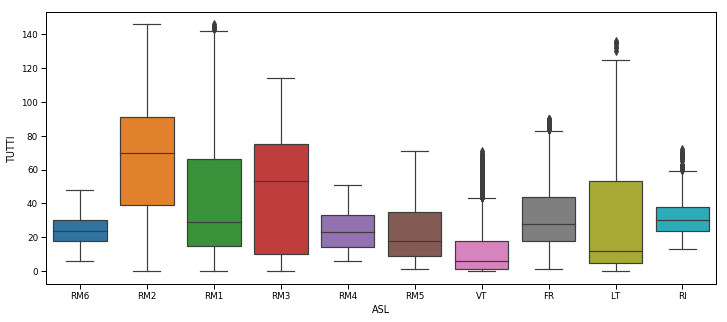

In [15]:
plt.figure(figsize=(12,5))
sns.set_context("paper")
sns.boxplot(x = 'ASL', y = 'TUTTI' , data = df )
plt.show()

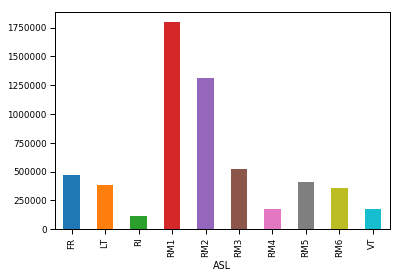

In [29]:
df.groupby('ASL')['TUTTI'].sum().plot(kind= 'bar')
plt.show()

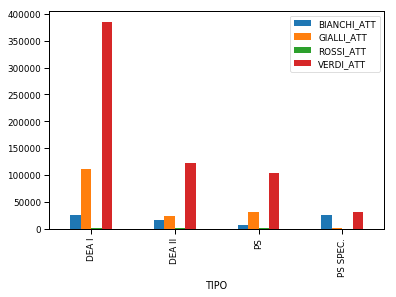

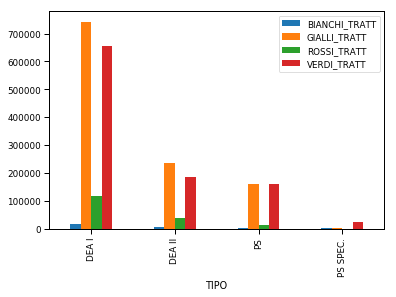

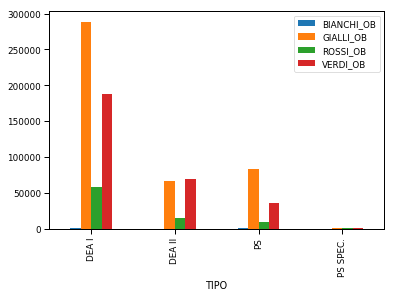

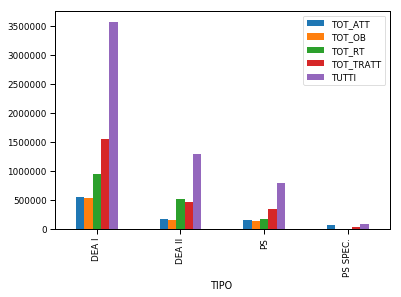

In [17]:
#df['TIPO']
df.groupby('TIPO')[['BIANCHI_ATT', 'GIALLI_ATT' , 'ROSSI_ATT' ,'VERDI_ATT' ]].sum().plot(kind= 'bar')
df.groupby('TIPO')[['BIANCHI_TRATT', 'GIALLI_TRATT' , 'ROSSI_TRATT' ,'VERDI_TRATT' ]].sum().plot(kind= 'bar')
df.groupby('TIPO')[['BIANCHI_OB', 'GIALLI_OB' , 'ROSSI_OB' ,'VERDI_OB' ]].sum().plot(kind= 'bar')
df.groupby('TIPO')[['TOT_ATT', 'TOT_OB', 'TOT_RT', 'TOT_TRATT', 'TUTTI' ]].sum().plot(kind= 'bar')

plt.show()

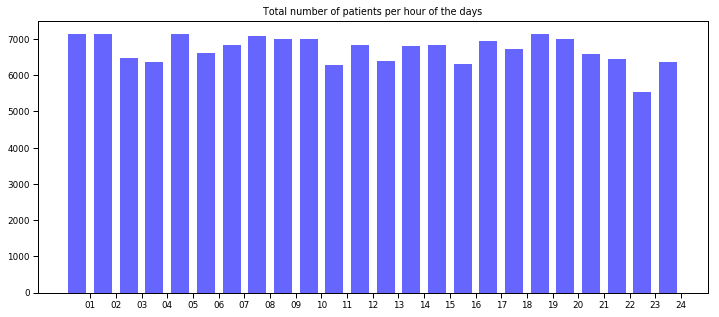

In [33]:
plt.figure(figsize=(12,5))
plt.title('Total number of patients per hour of the days')
plt.hist(df.hour, bins = 24, range = (0, 24), rwidth=0.7, color = 'blue', alpha = 0.6)
plt.xticks(range(1, 25), '01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24'.split())

plt.show()

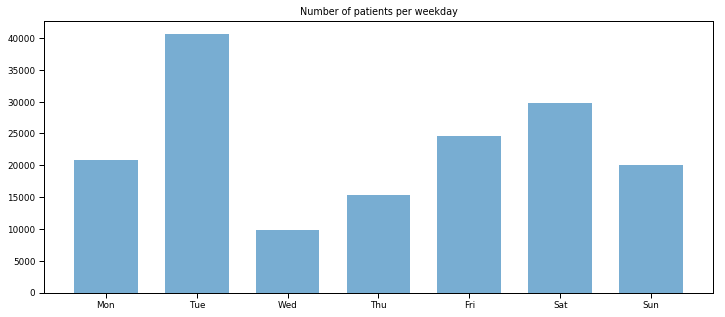

In [30]:
plt.figure(figsize=(12,5))
plt.hist(df['Weekday'], bins = 7, range = (-0.5, 6.5), rwidth=0.7, alpha = 0.6)
plt.title('Number of patients per weekday')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.show()

In [20]:
df.groupby('Weekday').size()

Weekday
0    20843
1    40684
2     9835
3    15259
4    24546
5    29846
6    19976
dtype: int64

In [21]:
df['Weekday'].value_counts() 

1    40684
5    29846
4    24546
0    20843
6    19976
3    15259
2     9835
Name: Weekday, dtype: int64

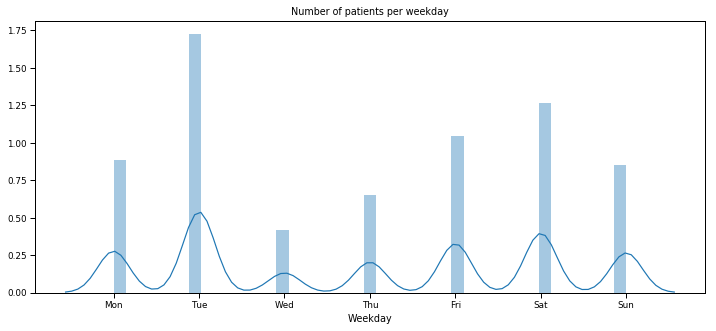

In [31]:
plt.figure(figsize=(12,5))
plt.title('Number of patients per weekday')
sns.distplot(df['Weekday'])
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.show()

In [23]:
by_cross = df.groupby('Weekday hour'.split()).apply(count_rows).unstack()
by_cross.index = ['Mon Tue Wed Thu Fri Sat Sun'.split()]
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Mon,890,890,889,890,890,890,890,890,890,890,...,890,890,890,890,890,899,900,845,542,806
Tue,1798,1800,1428,1710,1800,1457,1800,1755,1856,2026,...,1746,1349,1590,1440,1787,1800,1528,1705,1478,1788
Wed,440,440,440,440,440,440,440,440,440,428,...,435,440,440,440,440,440,441,395,352,396
Thu,900,900,901,540,900,899,890,890,890,890,...,440,440,440,442,450,307,445,450,390,373
Fri,889,890,889,890,890,890,856,890,890,530,...,1332,1327,1337,1309,1320,1305,1320,1053,978,820
Sat,1325,1350,1080,1035,1350,1350,1080,1350,1170,1350,...,1350,990,1350,1350,1350,1350,1350,1230,1080,1305
Sun,884,870,855,861,879,700,880,866,868,880,...,649,867,893,844,890,890,610,773,712,890


In [24]:
by_cross.fillna(0, inplace=True)

In [25]:
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Mon,890,890,889,890,890,890,890,890,890,890,...,890,890,890,890,890,899,900,845,542,806
Tue,1798,1800,1428,1710,1800,1457,1800,1755,1856,2026,...,1746,1349,1590,1440,1787,1800,1528,1705,1478,1788
Wed,440,440,440,440,440,440,440,440,440,428,...,435,440,440,440,440,440,441,395,352,396
Thu,900,900,901,540,900,899,890,890,890,890,...,440,440,440,442,450,307,445,450,390,373
Fri,889,890,889,890,890,890,856,890,890,530,...,1332,1327,1337,1309,1320,1305,1320,1053,978,820
Sat,1325,1350,1080,1035,1350,1350,1080,1350,1170,1350,...,1350,990,1350,1350,1350,1350,1350,1230,1080,1305
Sun,884,870,855,861,879,700,880,866,868,880,...,649,867,893,844,890,890,610,773,712,890


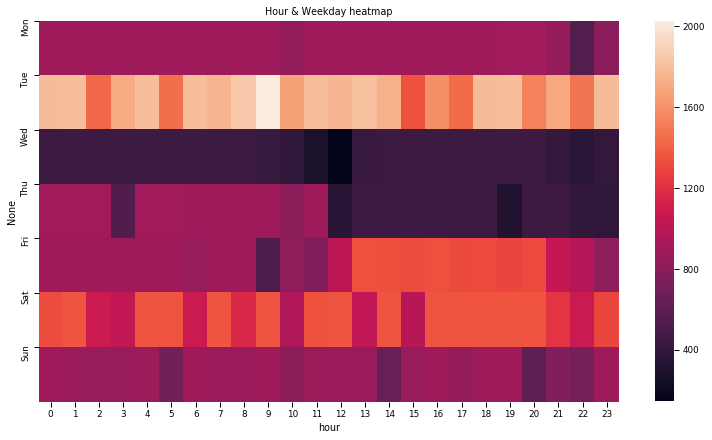

In [32]:
import seaborn as sb
plt.figure(figsize=(13,7))
plt.title('Hour & Weekday heatmap')
sb.heatmap(by_cross)
plt.yticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.show()